# Height Profile

In [32]:
from datetime import datetime
import matplotlib.pyplot as plt
from RadarLidarWindSpeed import RadarLidarWindSpeed
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [33]:
dateBegin = datetime(2020, 7, 1)
dateEnd = datetime(2020, 7, 2)

In [34]:
analysis = RadarLidarWindSpeed(dateBegin, dateEnd)
analysis.importDataset()
analysis.calculateFusion()
heightGrid = analysis.heightGrid

In [36]:
df = analysis.dataframe
df.reset_index(level=0, inplace=True)

In [39]:
fusion = df.pivot(index="height", columns="time", values="Fusion")
radar = df.pivot(index="height", columns="time", values="speedRadar")
lidar = df.pivot(index="height", columns="time", values="speedLidar")

In [40]:
date = datetime(2020,7,1,10,0)


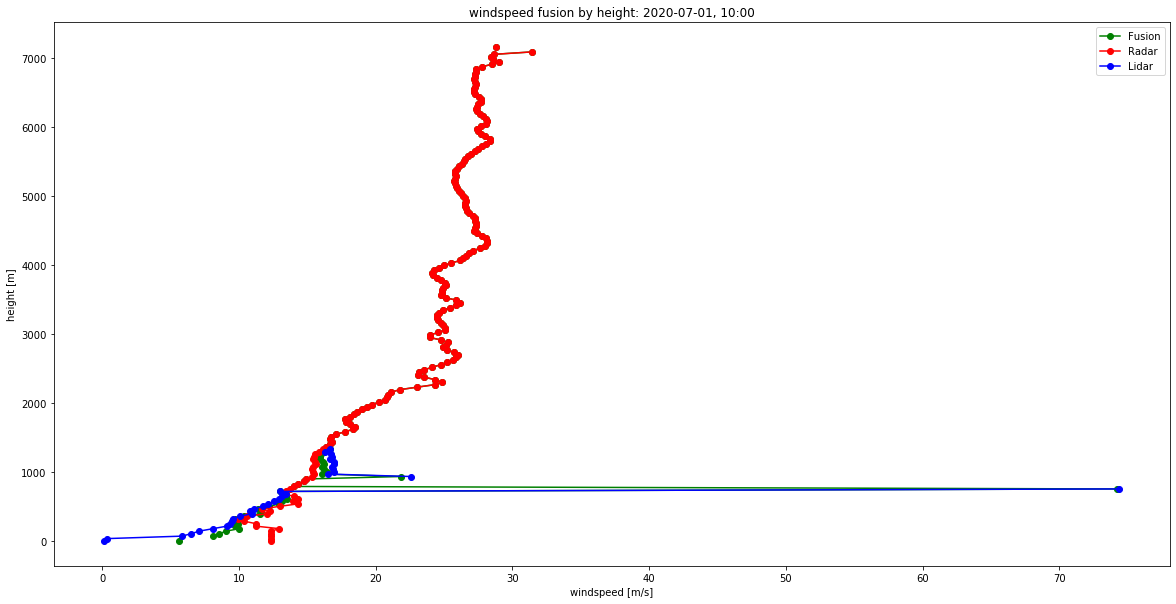

In [45]:
plt.figure(figsize=(20,10))
plt.plot(fusion[date],heightGrid, 'go-', label='Fusion')
plt.plot(radar[date],heightGrid, 'ro-', label='Radar')
plt.plot(lidar[date],heightGrid, 'bo-', label='Lidar')
#axes = plt.axes()
plt.xlabel("windspeed [m/s]")
plt.ylabel("height [m]")
plt.legend()
plt.title('windspeed fusion by height: '+date.strftime("%Y-%m-%d, %H:%M"))
plt.show()